# <h1 align=center><font size = 6><b>Timeseries & Forecasting<b></font></h1>
<h2 align=center><font size = 5>House Property Sales</font></h2>

## 1. Business Understanding

### Case

Perusahaan House Property memberi tugas kepada tim scientist untuk melakukan analisis terhadap data sales dari tahun 2007 sampai pertengahan 2019 dikarenakan terdapat penurunan sales dan ingin mengoptimalkan sales di masa yang akan depan. Maka tim data scientist membuat dengan Time Series Analysis dan Forecasting untuk membantu perusahaan dalam menjaga sales kedepannya.


### Problem

*   Tidak mengetahui model yang tepat untuk melakukan peramalan pada masa yang akan datang.
*   Customer mengeluh terhadap ketersediaan Tipe Properti dan Jumlah Kamar yang tidak sesuai dengan keinginan customer.
*   Perusahaan mengalami penurunan sales secara tiba-tiba pada musim tertentu.
*   Belum mengetahui pola dari Time Series dari data House Property.



### Objective

*   Melakukan analisis terhadap data historical untuk mempersiapkan Tipe Properti dan Jumlah Kamar yang sesuai dengan keinginan customer.
*   Melakukan Forecasting untuk mengantisipasi penurunan sales.
*  Mengetahui pola dari Time Series agar memberikan model yang terbaik.
*  Memilih model yang paling tepat untuk melakukan prediksi di masa yang akan dating.

## 2. Data Understanding

### Source Data

https://www.kaggle.com/datasets/htagholdings/property-sales?select=raw_sales.csv


| column | description |
| ------ | ----------- |
| `datesold` | tanggal penjualan yang terjadi pada House Property |
| `postcode` | sekelompok angka yang ditambahkan ke alamat pos |
| `price` | total Penjualan yang terjadi pada 1 unit rumah
 |
| `propertytype` | tipe Properti antara house dan unit |
| `bedrooms` | Jumlah kamar dalam 1 unit rumah |



### Import Libraries
Library yang akan digunakan dalam project ini.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/House Property Sales/raw_sales.csv')

Mounted at /content/drive


### Exploratory Data Analysis (EDA)

In [ ]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [ ]:
data.tail()

,datesold,postcode,price,propertyType,bedrooms
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2
29579,2019-07-26 00:00:00,2612,775000,unit,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
data.nunique()

datesold        3582
postcode          27
price           2554
propertyType       2
bedrooms           6
dtype: int64

Ingin mengetahui pada penjualan terdapat tahun keberapa

In [ ]:
# memisahkan tahun dari tanggal
data['datesold'][0].split('-')[0]

'2007'

In [ ]:
def fetch_year(date):
    return date.split('-')[0]

In [ ]:
# buat kolom baru (years) khussus mengisi tahun
data['years']=data['datesold'].apply(fetch_year)

In [ ]:
data.head()

,datesold,postcode,price,propertyType,bedrooms,years
0,2007-02-07 00:00:00,2607,525000,house,4,2007
1,2007-02-27 00:00:00,2906,290000,house,3,2007
2,2007-03-07 00:00:00,2905,328000,house,3,2007
3,2007-03-09 00:00:00,2905,380000,house,4,2007
4,2007-03-21 00:00:00,2906,310000,house,3,2007


In [ ]:
print("Unique Value in Property Type : ",data['propertyType'].unique())
print("Unique Value in Postcode : ",data['postcode'].unique())
print("Unique Value in Years : ",data['years'].unique()) # 2007 - 2019

Unique Value in Property Type :  ['house' 'unit']
Unique Value in Postcode :  [2607 2906 2905 2606 2902 2612 2904 2615 2914 2602 2600 2605 2603 2611
 2903 2617 2913 2604 2614 2912 2601 2900 2620 2618 2616 2911 2609]
Unique Value in Years :  ['2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019']


Tahun yang memiliki Sales paling banyak

In [ ]:
data_years = data.groupby(['years'])['price'].sum().reset_index()
data_years.head()

,years,price
0,2007,76789450
1,2008,315547250
2,2009,707427239
3,2010,870123280
4,2011,925445775


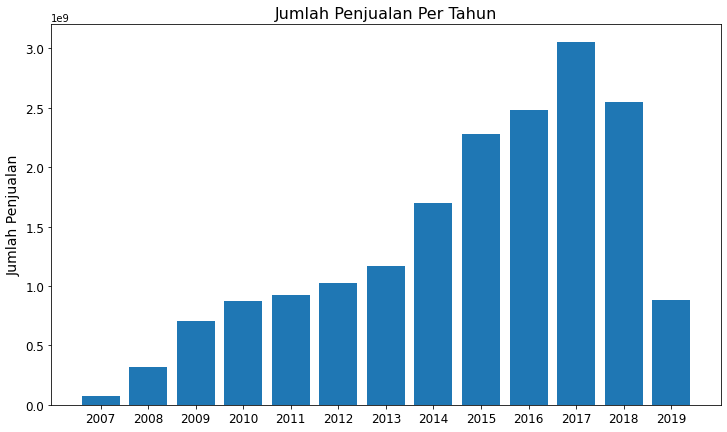

In [ ]:
plt.figure(figsize=(12,7))
plt.bar(data_years['years'], data_years['price'])

plt.title('Jumlah Penjualan Per Tahun', size=16)
plt.ylabel('Jumlah Penjualan', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

> Dari grafik ini kita dapat melihat bahwa 
*   Penjualan pada tahun 2017 merupakan penjualan paling tinggi.
*   Penjualan tahun 2019 rendah dikarenakan data hanya sampai bulan 7.



Tipe Property yang memiliki penjualan lebih banyak

In [ ]:
property_type =data.groupby(['propertyType'])['price'].sum().reset_index()
property_type.head()

,propertyType,price
0,house,15908618866
1,unit,2127379770


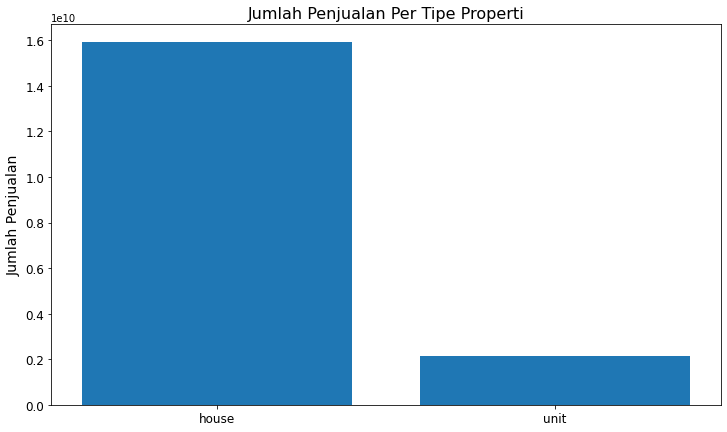

In [ ]:
plt.figure(figsize=(12,7))
plt.bar(property_type['propertyType'], property_type['price'])

plt.title('Jumlah Penjualan Per Tipe Properti', size=16)
plt.ylabel('Jumlah Penjualan', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

> Dari grafik ini kita dapat melihat bahwa penjualan pada **Tipe House** memiliki penjualan yang lebih banyak daripada Tipe Unik

In [ ]:
# membuat pivot table
pivot = data.pivot_table('price',index='propertyType',columns='bedrooms',aggfunc={'price':'sum'})
pivot

bedrooms,0,1,2,3,4,5
propertyType,,,,,,
house,12870500,33189450,391554640,6207526896,7474757065,1788720315
unit,3398500,513471008,1199563417,383121845,24386000,3439000


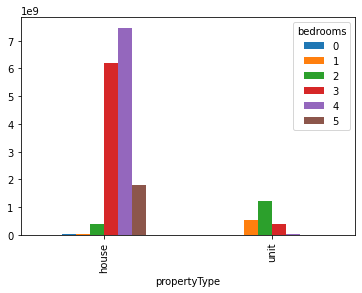

In [ ]:
pivot.plot(kind='bar')

> Dari grafik di atas dapat dilihat bahwa:
*   Tipe House dengan bedrooms 4 kamar memiliki penjualan paling tinggi dibandingkan bedrooms lainnya.
*   Tipe Unit dengan bedrooms 2 kamar memiliki penjualan paling tinggi dibandingkan bedrooms lainnya.


## 3. Data Preparation

Selanjutnya pada Data Preparation akan dilakukan preparasi data yang akan dilakukan analisis lebih lanjut. Data yang yang dipersiapkan dengan kategori Tipe Properti : House dan Jumlah Kamar : 4 dimana akan membantu perusahaan memaksimalkan penjualan di masa depan dengan mempersiapkan data dengan tipe properti yang sesuai dengan kebutuhan kebanyakan customer.

In [ ]:
house=data[data['propertyType']=='house']
data=[4]
data2=house[house['bedrooms'].isin(data)].reset_index().drop('index', axis=1)
data2.head()

,datesold,postcode,price,propertyType,bedrooms,years
0,2007-02-07 00:00:00,2607,525000,house,4,2007
1,2007-03-09 00:00:00,2905,380000,house,4,2007
2,2007-04-04 00:00:00,2905,465000,house,4,2007
3,2007-04-30 00:00:00,2606,1530000,house,4,2007
4,2007-06-27 00:00:00,2612,850000,house,4,2007


In [ ]:
data2.tail()

,datesold,postcode,price,propertyType,bedrooms,years
10399,2019-07-25 00:00:00,2607,790000,house,4,2019
10400,2019-07-25 00:00:00,2913,792000,house,4,2019
10401,2019-07-26 00:00:00,2902,657500,house,4,2019
10402,2019-07-27 00:00:00,2905,610000,house,4,2019
10403,2019-07-27 00:00:00,2615,647500,house,4,2019


> Data di atas mencakup properti Type berjenis house dan jumlah kamar berjumlah 4.

In [ ]:
data2.shape

(10404, 6)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      10404 non-null  object
 1   postcode      10404 non-null  int64 
 2   price         10404 non-null  int64 
 3   propertyType  10404 non-null  object
 4   bedrooms      10404 non-null  int64 
 5   years         10404 non-null  object
dtypes: int64(3), object(3)
memory usage: 487.8+ KB


> Datesold masih bertipe objek dan seharusnya bertipe datetime.

### Format Data

In [ ]:
data2['Date'] = pd.to_datetime(data2['datesold'])
data2.head()

,datesold,postcode,price,propertyType,bedrooms,years,Date
0,2007-02-07 00:00:00,2607,525000,house,4,2007,2007-02-07
1,2007-03-09 00:00:00,2905,380000,house,4,2007,2007-03-09
2,2007-04-04 00:00:00,2905,465000,house,4,2007,2007-04-04
3,2007-04-30 00:00:00,2606,1530000,house,4,2007,2007-04-30
4,2007-06-27 00:00:00,2612,850000,house,4,2007,2007-06-27



*   Kolom yang digunakan untuk melakukan analysis yaitu kolom **Date** dan **Price** (dimana price ini merupakan sales).



In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      10404 non-null  object        
 1   postcode      10404 non-null  int64         
 2   price         10404 non-null  int64         
 3   propertyType  10404 non-null  object        
 4   bedrooms      10404 non-null  int64         
 5   years         10404 non-null  object        
 6   Date          10404 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 569.1+ KB


In [ ]:
data2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10399    False
10400    False
10401    False
10402    False
10403    False
Length: 10404, dtype: bool

### Cek Missing Value

In [ ]:
data2.isna()

,datesold,postcode,price,propertyType,bedrooms,years,Date
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10399,False,False,False,False,False,False,False
10400,False,False,False,False,False,False,False
10401,False,False,False,False,False,False,False
10402,False,False,False,False,False,False,False


In [ ]:
data2.isnull().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
years           0
Date            0
dtype: int64

> Data tersebut tidak memiliki Missing Value.

In [ ]:
df=data2.groupby(['Date'])['price'].sum().reset_index()
df.set_index('Date',inplace=True)
df.head()

,price
Date,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000


In [ ]:
df.rename(columns={'price':'Sales'}, inplace=True)
df.head()

,Sales
Date,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000


### Cek Outliers

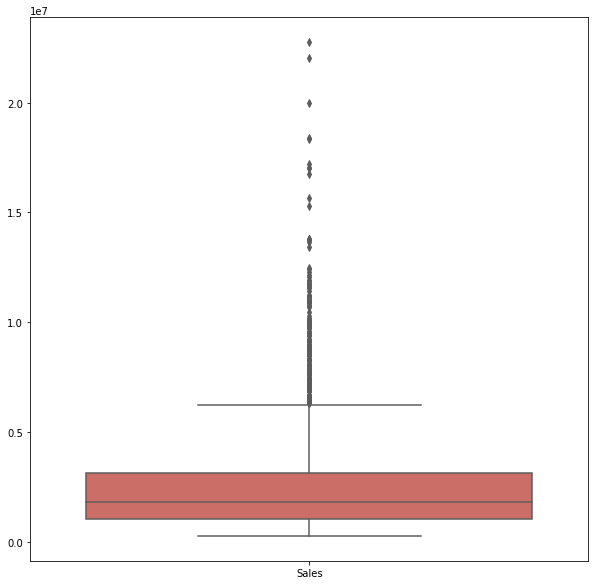

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) #buat frame/figure
sns.boxplot(data=df, palette=('#db5f57', '#dbc257', '#91db57', '#57d3db'))

> Pada grafik tersebut dapat dilihat bahwa terdapat outlier pada penjualan dikarenakan ada data time series menunjukkan efek musiman dari penjualan tersebut sehingga informasi data sangat penting untuk diolah lebih lanjut dan outlier tersebut dapat dipertahankan. 
> **Faktor yang mempengaruhi seperti luas tanah dan lainnya tidak terdapat pada data.

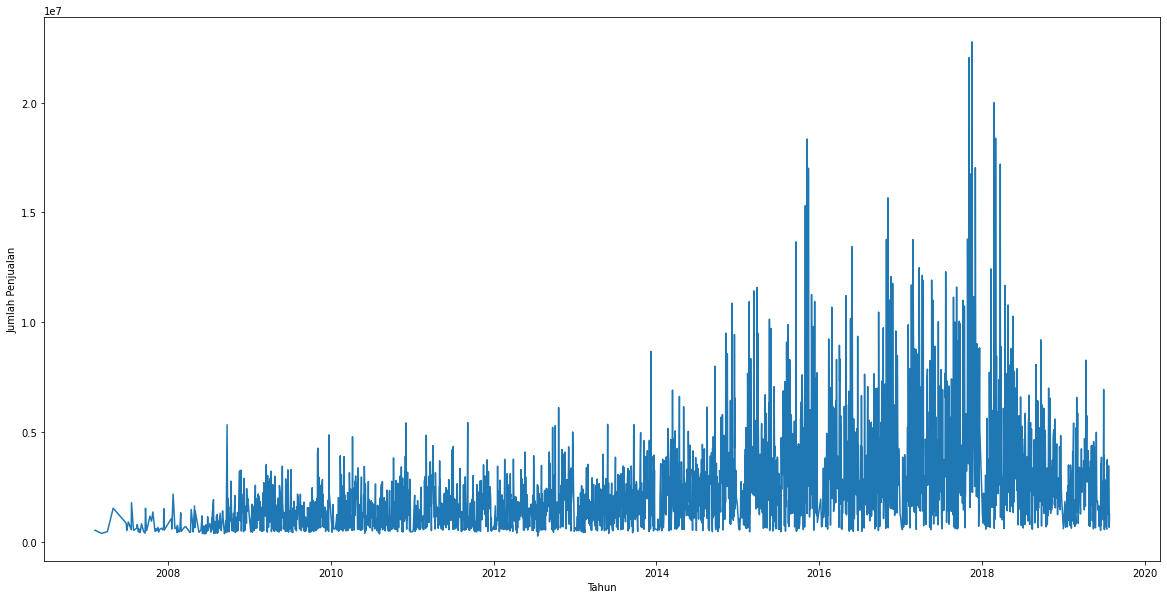

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penjualan")
plt.plot(df)

> Pada grafik di atas dapat dilihat bahwa penjualan cenderung mengalami kenaikan dari tahun 2008 sampai 2019.


Untuk Timeseries dan Forecasting, data harus bersifat stasioner.

### Cek Stasioner

#### Rolling Statistic test

In [ ]:
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

                    Sales
Date                     
2007-02-07            NaN
2007-03-09            NaN
2007-04-04            NaN
2007-04-30            NaN
2007-06-27            NaN
2007-06-28            NaN
2007-06-30            NaN
2007-07-07            NaN
2007-07-20            NaN
2007-07-21            NaN
2007-07-30            NaN
2007-07-31  778250.000000
2007-08-14  786583.333333
2007-08-16  820750.000000
2007-08-21  819916.666667
                    Sales
Date                     
2007-02-07            NaN
2007-03-09            NaN
2007-04-04            NaN
2007-04-30            NaN
2007-06-27            NaN
2007-06-28            NaN
2007-06-30            NaN
2007-07-07            NaN
2007-07-20            NaN
2007-07-21            NaN
2007-07-30            NaN
2007-07-31  441655.177095
2007-08-14  437364.931531
2007-08-16  418315.045477
2007-08-21  419097.397735


> Melakukan rolling terhadap rata-rata dan standar deviasi untuk mengecek apakah series ini stasioner atau tidak.

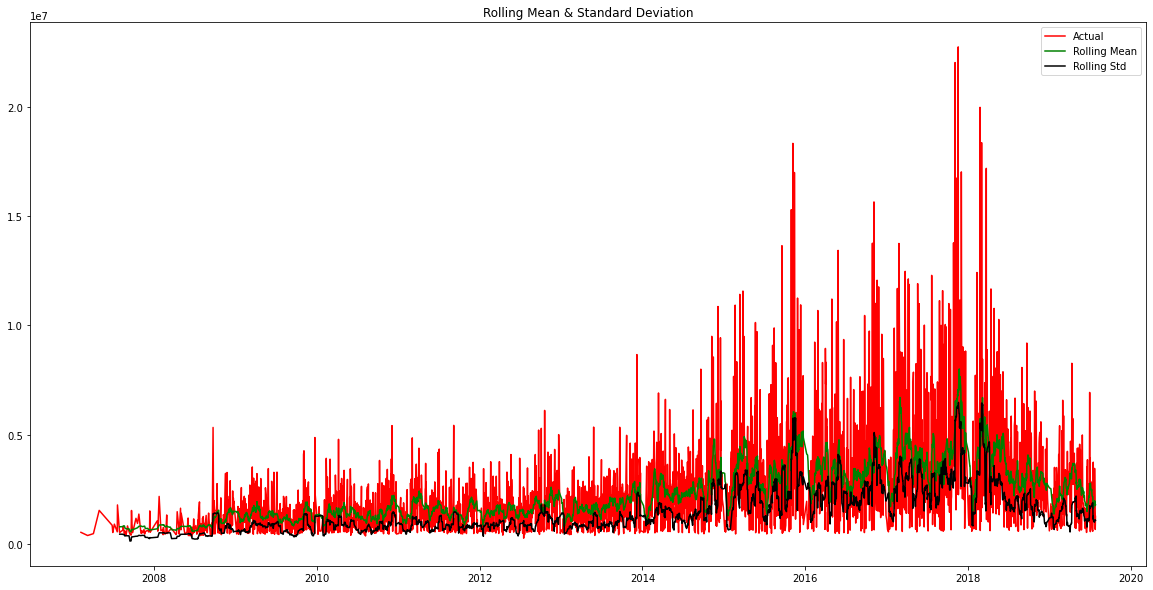

In [ ]:
plt.figure(figsize=(20,10))
actual=plt.plot(df, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

> Pada grafik diatas kita melihat bahwa data actual dan rolling (mean dan std) berdekatan yang menandakan bahwa series ini **stasioner**.

#### Augmented Dickey-Fuller (ADF) test

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(df['Sales'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            -3.971670
p-value                    0.001566
Lags Used                 24.000000
No. of Obs              3030.000000
Critical Value (1%)       -3.432510
Critical Value (5%)       -2.862494
Critical Value (10%)      -2.567278
dtype: float64


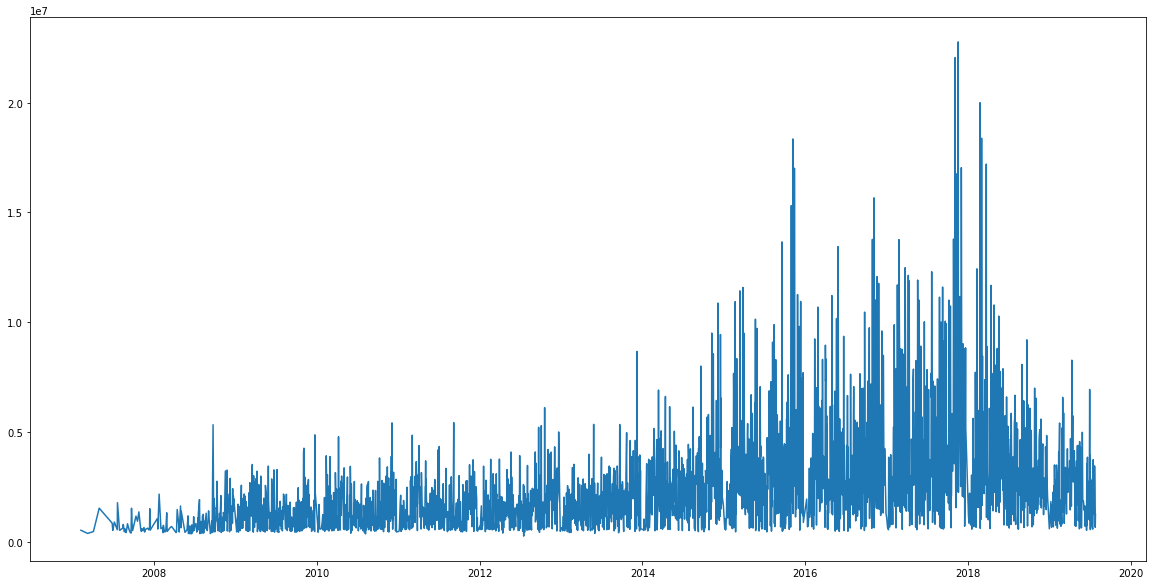

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df)

> Dalam Dickey-Fuller test ini karena t-value lebih kecil dari critical values pada semua level, dan juga p-value yang lebih kecil dari 0.05 yang menandakan berhasil menerima null hypothesis pada 90%, 95%, and 99% confidence, yang berarti bahwa data time series ini strongly stationary.

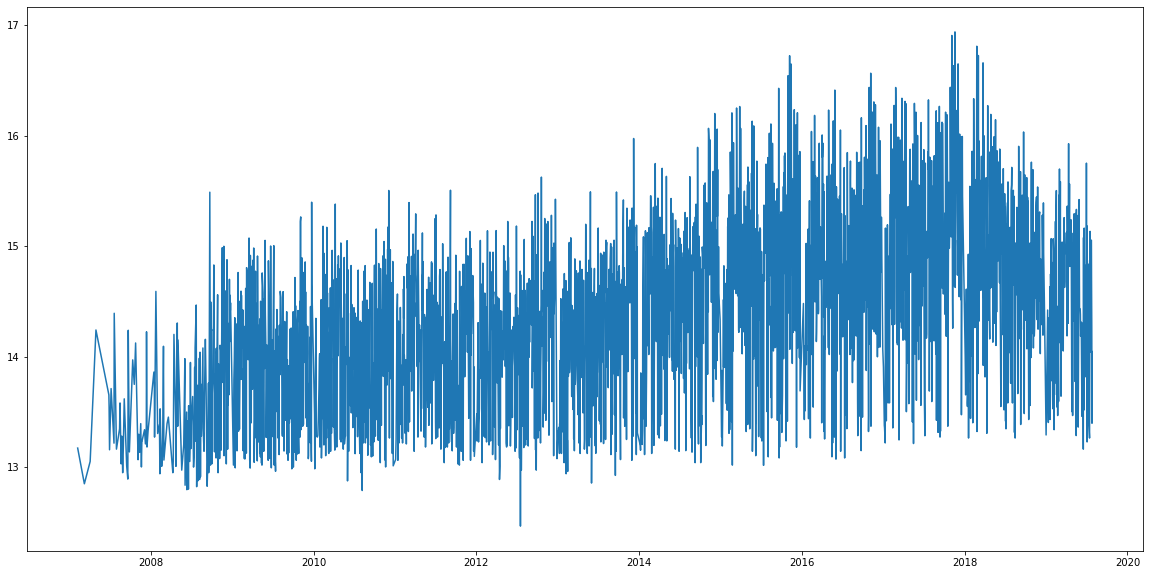

In [ ]:
plt.figure(figsize=(20,10))
data_log=np.log(df) #kita melakukan log analysis untuk men stabilkan variance dari sebuah series. 
plt.plot(data_log)

In [ ]:
df

,Sales
Date,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000
...,...
2019-07-22,1250000
2019-07-23,3453000
2019-07-25,1582000


In [ ]:
data_log

,Sales
Date,
2007-02-07,13.171154
2007-03-09,12.847927
2007-04-04,13.049793
2007-04-30,14.240778
2007-06-27,13.652992
...,...
2019-07-22,14.038654
2019-07-23,15.054754
2019-07-25,14.274200


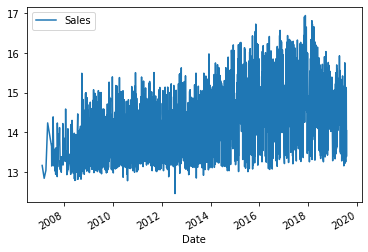

In [ ]:
data_log.plot()

In [ ]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3055 entries, 2007-02-07 to 2019-07-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   3055 non-null   float64
dtypes: float64(1)
memory usage: 47.7 KB


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

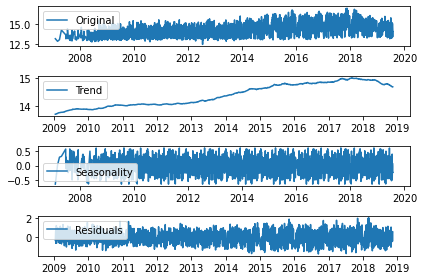

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log,model='additive', filt=None, freq=365, two_sided=True, extrapolate_trend=0)


trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# plotting original, trend, seasonality, residual

Text(0.5, 1.0, 'Autocorrelation Function')

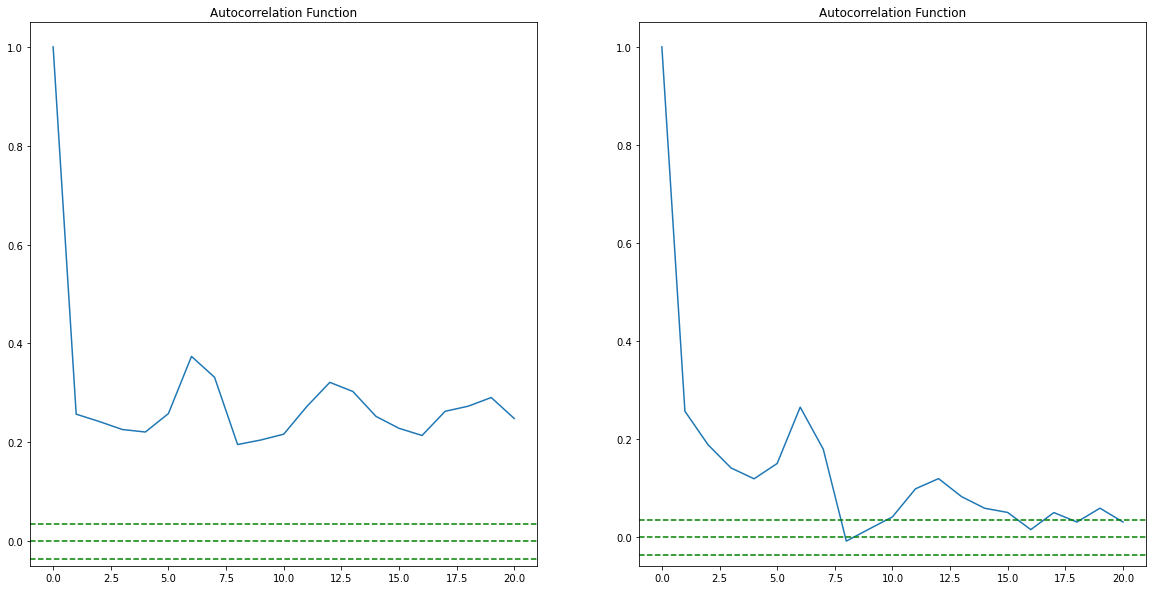

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

lag_acf = acf(df, nlags = 20)
lag_pacf = pacf(df, nlags = 20, method = 'ols')

plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'green')
plt.axhline(y = -1.96/np.sqrt(len(df)), linestyle = '--', color = 'green')
plt.axhline(y = 1.96/np.sqrt(len(df)), linestyle = '--', color = 'green')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'green')
plt.axhline(y = -1.96/np.sqrt(len(df)), linestyle = '--', color = 'green')
plt.axhline(y = 1.96/np.sqrt(len(df)), linestyle = '--', color = 'green')
plt.title("Autocorrelation Function")

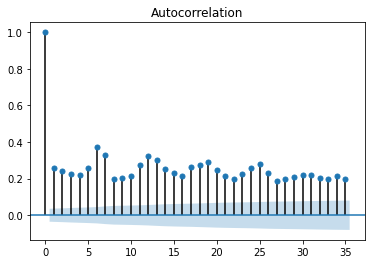

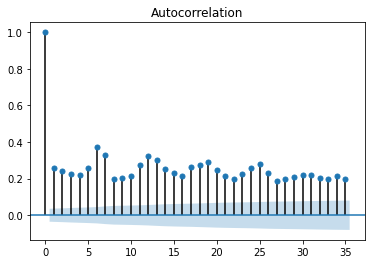

In [ ]:
plot_acf(df)

## 4. Modeling

### Prophet Facebook

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [ ]:
data2.head()

,datesold,postcode,price,propertyType,bedrooms,years,Date
0,2007-02-07 00:00:00,2607,525000,house,4,2007,2007-02-07
1,2007-03-09 00:00:00,2905,380000,house,4,2007,2007-03-09
2,2007-04-04 00:00:00,2905,465000,house,4,2007,2007-04-04
3,2007-04-30 00:00:00,2606,1530000,house,4,2007,2007-04-30
4,2007-06-27 00:00:00,2612,850000,house,4,2007,2007-06-27


In [ ]:
data_prophet=data2.groupby(['Date'])['price'].sum().reset_index()
data_prophet.head()

,Date,price
0,2007-02-07,525000
1,2007-03-09,380000
2,2007-04-04,465000
3,2007-04-30,1530000
4,2007-06-27,850000


In [ ]:
df = data_prophet.rename(columns = {'Date' : 'ds',
                            'price' : 'y'})

df.head()

,ds,y
0,2007-02-07,525000
1,2007-03-09,380000
2,2007-04-04,465000
3,2007-04-30,1530000
4,2007-06-27,850000


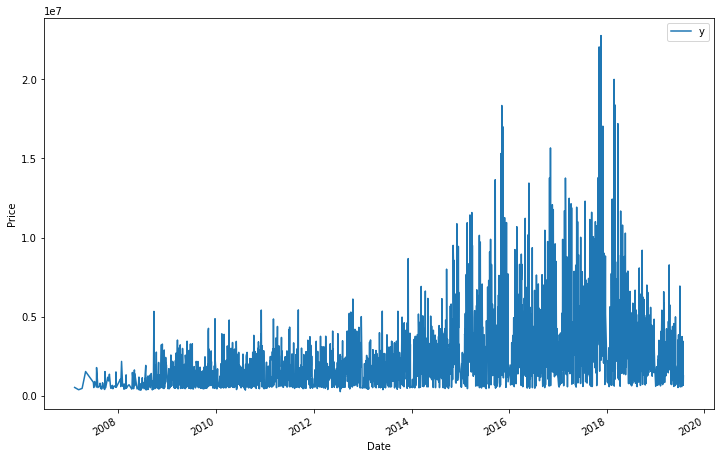

In [ ]:
ax = df.set_index('ds').plot(figsize = (12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [ ]:
my_model = Prophet(interval_width = 0.95)

In [ ]:
my_model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dataset = my_model.make_future_dataframe(periods = 36, freq = 'MS')
future_dataset.head()

,ds
0,2007-02-07
1,2007-03-09
2,2007-04-04
3,2007-04-30
4,2007-06-27


In [ ]:
forecast = my_model.predict(future_dataset)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2007-02-07,5.396034e+05,-2.990507e+06,3.932814e+06
1,2007-03-09,1.358168e+06,-2.272595e+06,4.935800e+06
2,2007-04-04,1.220960e+06,-2.413024e+06,4.663279e+06
3,2007-04-30,6.638276e+05,-2.951087e+06,4.050938e+06
4,2007-06-27,3.348633e+05,-3.358705e+06,3.620024e+06


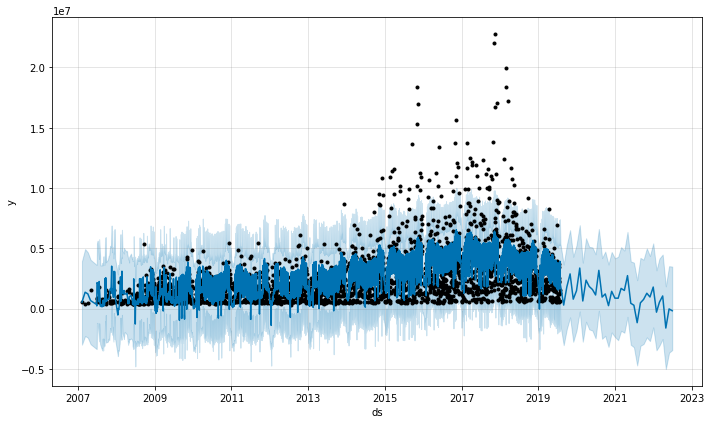

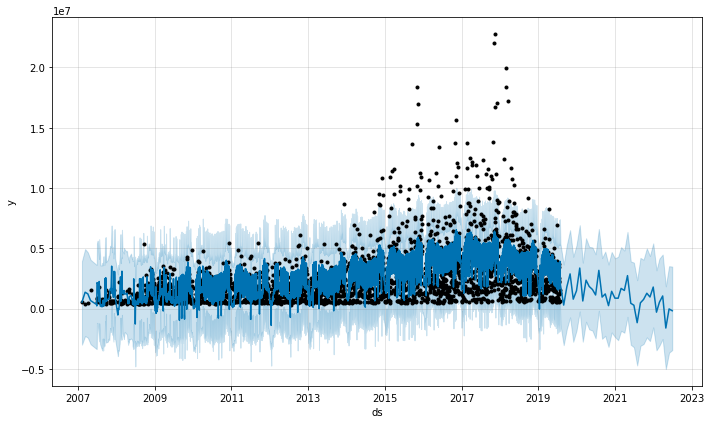

In [ ]:
my_model.plot(forecast, uncertainty = True)

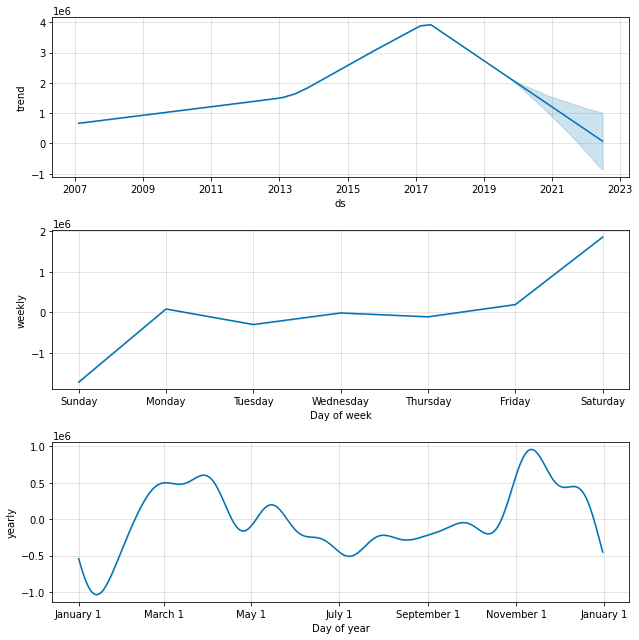

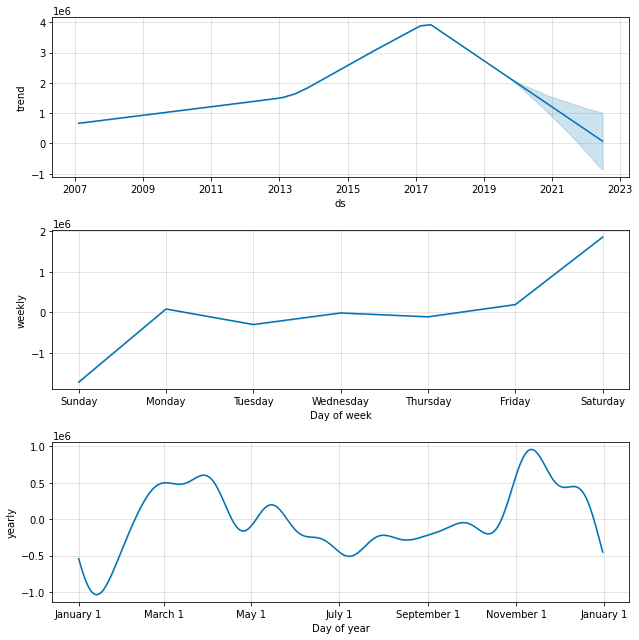

In [ ]:
my_model.plot_components(forecast)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


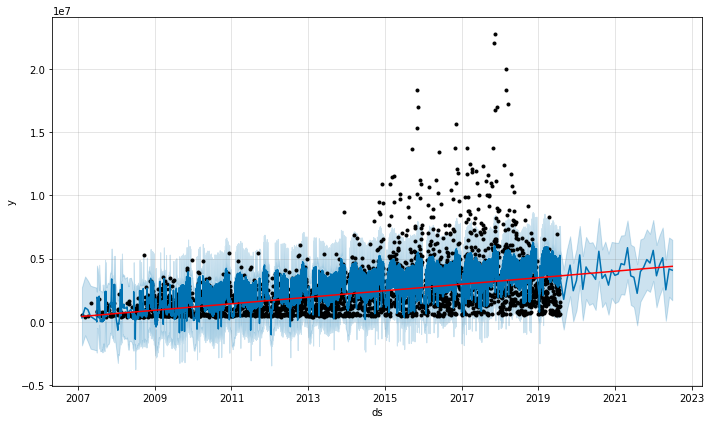

In [ ]:
pro_change = Prophet(n_changepoints = 20, yearly_seasonality = True, changepoint_prior_scale = 0.001)
forecast = pro_change.fit(df).predict(future_dataset)
fig =pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
se = np.square(forecast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse

1837314.1377667414

### Moving Average

In [ ]:
data2.head()

,datesold,postcode,price,propertyType,bedrooms,years,Date
0,2007-02-07 00:00:00,2607,525000,house,4,2007,2007-02-07
1,2007-03-09 00:00:00,2905,380000,house,4,2007,2007-03-09
2,2007-04-04 00:00:00,2905,465000,house,4,2007,2007-04-04
3,2007-04-30 00:00:00,2606,1530000,house,4,2007,2007-04-30
4,2007-06-27 00:00:00,2612,850000,house,4,2007,2007-06-27


In [ ]:
df_ma=data2.groupby(['Date'])['price'].sum().reset_index()
df_ma.set_index('Date',inplace=True)
df_ma.head()

,price
Date,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000


In [ ]:
df_ma.rename(columns={'price':'Sales'}, inplace=True)
df_ma.head()

,Sales
Date,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000


In [ ]:
ma = df_ma["Sales"].rolling(window=12).mean()

In [ ]:
ma.head(15)

Date
2007-02-07              NaN
2007-03-09              NaN
2007-04-04              NaN
2007-04-30              NaN
2007-06-27              NaN
2007-06-28              NaN
2007-06-30              NaN
2007-07-07              NaN
2007-07-20              NaN
2007-07-21              NaN
2007-07-30              NaN
2007-07-31    778250.000000
2007-08-14    786583.333333
2007-08-16    820750.000000
2007-08-21    819916.666667
Name: Sales, dtype: float64

In [ ]:
ma_sales=pd.concat([df_ma,ma],axis=1).dropna()

In [ ]:
ma_sales.columns=[['actual_sales','forecast_sales']]
ma_sales.head(15)

,actual_sales,forecast_sales
Date,,
2007-07-31,520000,778250.000000
2007-08-14,625000,786583.333333
2007-08-16,790000,820750.000000
2007-08-21,455000,819916.666667
2007-08-23,560000,739083.333333
2007-08-24,585000,717000.000000
2007-08-28,420000,688250.000000
2007-08-31,532500,689541.666667
2007-09-04,820000,682875.000000


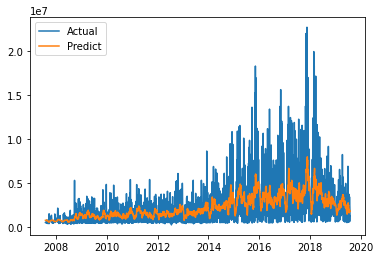

In [ ]:
plt.plot(ma_sales['actual_sales'],label='Actual');
plt.plot(ma_sales['forecast_sales'],label='Predict');
plt.legend()

### Model ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data2.head()

,datesold,postcode,price,propertyType,bedrooms,years,Date
0,2007-02-07 00:00:00,2607,525000,house,4,2007,2007-02-07
1,2007-03-09 00:00:00,2905,380000,house,4,2007,2007-03-09
2,2007-04-04 00:00:00,2905,465000,house,4,2007,2007-04-04
3,2007-04-30 00:00:00,2606,1530000,house,4,2007,2007-04-30
4,2007-06-27 00:00:00,2612,850000,house,4,2007,2007-06-27


In [ ]:
df_arima=data2.groupby(['Date'])['price'].sum().reset_index()
df_arima.set_index('Date',inplace=True)
df_arima.head()

,price
Date,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000


In [ ]:
df_arima.rename(columns={'price':'Sales'}, inplace=True)
df_arima.head()

,Sales
Date,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000


In [ ]:
df_arima.shape

(3055, 1)

In [ ]:
p_values=range(0,4)
q_values=range(0,4)
d_values=range(0,4)

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=df_arima[0:2862]
            test=df_arima[2862:3583]
            predictions=[]
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    model=arima.fit(disp=0)
                    pred=model.forecast()[0]
                    predictions.append(pred)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))
                except:
                    continue


MSE is 2036652427957.2434 with order (0, 0, 1)
MSE is 2053949283516.4048 with order (0, 0, 2)
MSE is 2039413866898.63 with order (0, 0, 3)
MSE is 2299874105122.1206 with order (0, 1, 1)
MSE is 2299062434899.004 with order (0, 1, 2)
MSE is 3092752779930.557 with order (0, 2, 1)
MSE is 2071796306765.141 with order (1, 0, 0)
MSE is 2228354971137.758 with order (1, 0, 1)
MSE is 2222874439527.14 with order (1, 0, 2)
MSE is 2211299887658.4756 with order (1, 0, 3)
MSE is 2343163569510.84 with order (1, 1, 0)
MSE is 2299109441288.921 with order (1, 1, 1)
MSE is 2217454373171.743 with order (1, 1, 2)
MSE is 2208797876707.3564 with order (1, 1, 3)
MSE is 6358471979907.082 with order (1, 2, 0)
MSE is 2058061888690.0344 with order (2, 0, 0)
MSE is 2223262729407.5737 with order (2, 0, 1)
MSE is 2228358062248.8477 with order (2, 0, 2)
MSE is 2107683792555.1042 with order (2, 0, 3)
MSE is 2020216846738.274 with order (2, 1, 0)
MSE is 2296461581838.6206 with order (2, 1, 1)
MSE is 2211789005506.4834 w

In [ ]:
from sklearn.metrics import mean_squared_error
arima=ARIMA(df_arima,order=(3,0,0))
model=arima.fit()
prediction=model.forecast(steps=3055)[0]
np.sqrt(mean_squared_error(df_arima,prediction))

2223191.301700702

In [ ]:
prediction

array([1823590.11209983, 1891664.23940736, 2078823.91337942, ...,
       2446728.99018003, 2446728.99018003, 2446728.99018003])

Plotting ARIMA Model


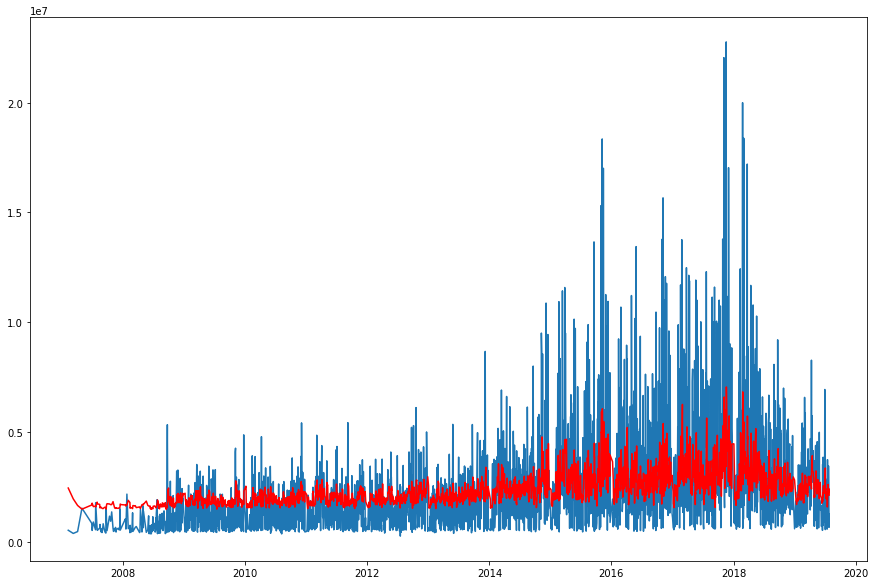

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize = (15, 10))
model = ARIMA(df_arima, order = (3, 0, 0))
results = model.fit()
plt.plot(df_arima)
plt.plot(results.fittedvalues, color = 'red')
print('Plotting ARIMA Model')

### SARIMA

In [ ]:
import statsmodels.api as sm

In [ ]:
df_arima.head()

,Sales
Date,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000


In [ ]:
model_sarima=sm.tsa.statespace.SARIMAX(df_arima['Sales'],
                                       order=(3,0,0),seasonal_order=(3,0,0,12))
results_sarima=model_sarima.fit(disp=0)

In [ ]:
prediction=results_sarima.predict(start=1,end=3055)

In [ ]:
prediction

1       6.462219e+04
2       1.113307e+05
3       1.473632e+05
4       2.402287e+05
5       3.190832e+05
            ...     
3051    1.175793e+06
3052    1.851287e+06
3053    1.940828e+06
3054    1.120412e+06
3055    7.938409e+05
Length: 3055, dtype: float64

In [ ]:
np.sqrt(mean_squared_error(df_arima,prediction))

2058137.9724070078

Plotting ARIMA Model


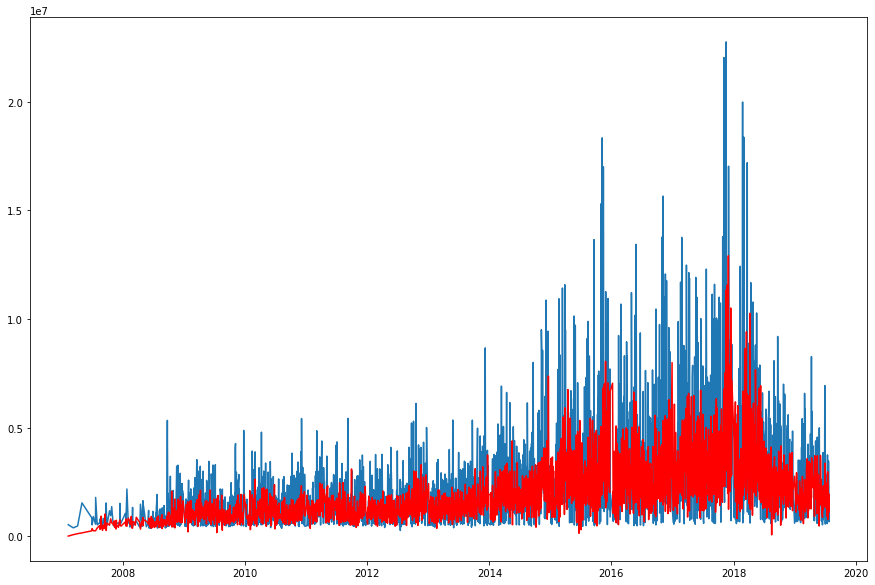

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(df_arima)
plt.plot(results_sarima.fittedvalues, color = 'red')
print('Plotting ARIMA Model')

## 5. Evaluation

In [ ]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### Evaluasi Prophet

In [ ]:
from sklearn.metrics import mean_squared_error
se = np.square(forecast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse

1837314.1377667414

In [ ]:
print('Mean : ',df['y'].mean())

Mean :  2446728.990180033


### Evaluasi Moving Average

In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(ma_sales['forecast_sales'],ma_sales['actual_sales'])))

1841963.3328166336


In [ ]:
print(df_ma['Sales'].mean())

2446728.990180033


### Evaluasi ARIMA

In [ ]:
arima=ARIMA(df_arima,order=(3,0,0))
model=arima.fit()
prediction=model.forecast(steps=3055)[0]
np.sqrt(mean_squared_error(df_arima,prediction))

2223191.301700702

In [ ]:
df_arima['Sales'].mean()

2446728.990180033

### Evaluasi SARIMA

In [ ]:
np.sqrt(mean_squared_error(df_arima,prediction))

2058137.9724070078

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

evaluation_results_sar = pd.DataFrame({'r2_score': r2_score(df_arima['Sales'], prediction)}, index=[0])
evaluation_results_sar['mean_absolute_error'] = mean_absolute_error(df_arima['Sales'], prediction)
evaluation_results_sar['mean_squared_error'] = mean_squared_error(df_arima['Sales'], prediction)
evaluation_results_sar['root_mean_squared_error'] = np.sqrt(mean_squared_error(df_arima['Sales'], prediction))
evaluation_results_sar['mean_absolute_percentage_error'] = np.mean(np.abs(prediction - df_arima['Sales'])
                                                               /np.abs(df_arima['Sales']))*100
evaluation_results_sar

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.143403,1.267315e+06,4.235932e+12,2.058138e+06,NaN


> Model Prophet memiliki RMSE yang paling kecil maka model ini yang paling tepat untuk data house property.

## 6. Deployment

> Karena tidak memiliki data baru maka pada Tahap Deployment akan digunakan **test data dalam menguji Model Prophet**


In [ ]:
df.head()

,ds,y
0,2007-02-07,525000
1,2007-03-09,380000
2,2007-04-04,465000
3,2007-04-30,1530000
4,2007-06-27,850000


In [ ]:
train = df.iloc[0:2445]
test = df.iloc[2445:3056]

In [ ]:
m=Prophet()
model=m.fit(test)
future_global=model.make_future_dataframe(periods=300,freq='D')
prediction=model.predict(future_global)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-15,4.385913e+06,1.126595e+06,7.098284e+06,4.385913e+06,4.385913e+06,-2.675701e+05,-2.675701e+05,-2.675701e+05,-6.269051e+04,-6.269051e+04,-6.269051e+04,-204879.542367,-204879.542367,-204879.542367,0.0,0.0,0.0,4.118343e+06
1,2017-06-16,4.383584e+06,1.299448e+06,6.957595e+06,4.383584e+06,4.383584e+06,-2.274470e+05,-2.274470e+05,-2.274470e+05,5.641140e+03,5.641140e+03,5.641140e+03,-233088.115173,-233088.115173,-233088.115173,0.0,0.0,0.0,4.156137e+06
2,2017-06-17,4.381254e+06,4.380452e+06,1.017652e+07,4.381254e+06,4.381254e+06,2.785588e+06,2.785588e+06,2.785588e+06,3.048363e+06,3.048363e+06,3.048363e+06,-262775.411229,-262775.411229,-262775.411229,0.0,0.0,0.0,7.166842e+06
3,2017-06-18,4.378924e+06,-8.767668e+05,4.944162e+06,4.378924e+06,4.378924e+06,-2.460897e+06,-2.460897e+06,-2.460897e+06,-2.166946e+06,-2.166946e+06,-2.166946e+06,-293950.333360,-293950.333360,-293950.333360,0.0,0.0,0.0,1.918028e+06
4,2017-06-19,4.376595e+06,7.105110e+05,6.606376e+06,4.376595e+06,4.376595e+06,-5.710027e+05,-5.710027e+05,-5.710027e+05,-2.444540e+05,-2.444540e+05,-2.444540e+05,-326548.726296,-326548.726296,-326548.726296,0.0,0.0,0.0,3.805592e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2020-05-18,4.190164e+05,-2.050038e+06,3.827893e+06,3.534075e+05,4.820365e+05,3.066710e+05,3.066710e+05,3.066710e+05,-2.444540e+05,-2.444540e+05,-2.444540e+05,551125.015028,551125.015028,551125.015028,0.0,0.0,0.0,7.256874e+05
906,2020-05-19,4.149426e+05,-2.568830e+06,3.389890e+06,3.488721e+05,4.782587e+05,6.412388e+04,6.412388e+04,6.412388e+04,-4.668262e+05,-4.668262e+05,-4.668262e+05,530950.079699,530950.079699,530950.079699,0.0,0.0,0.0,4.790665e+05
907,2020-05-20,4.108689e+05,-2.328643e+06,3.574136e+06,3.443409e+05,4.744702e+05,3.947880e+05,3.947880e+05,3.947880e+05,-1.130871e+05,-1.130871e+05,-1.130871e+05,507875.174287,507875.174287,507875.174287,0.0,0.0,0.0,8.056569e+05
908,2020-05-21,4.067951e+05,-1.994531e+06,3.647827e+06,3.398786e+05,4.706816e+05,4.195143e+05,4.195143e+05,4.195143e+05,-6.269051e+04,-6.269051e+04,-6.269051e+04,482204.803890,482204.803890,482204.803890,0.0,0.0,0.0,8.263094e+05


In [ ]:
plot_plotly(model, prediction)

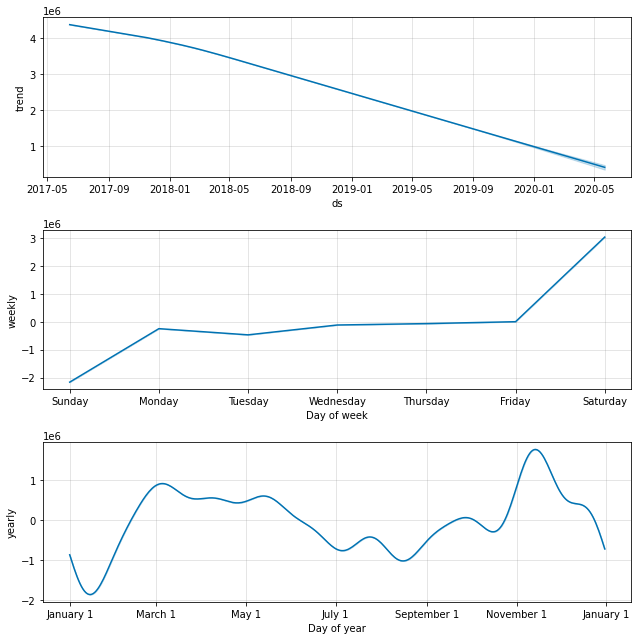

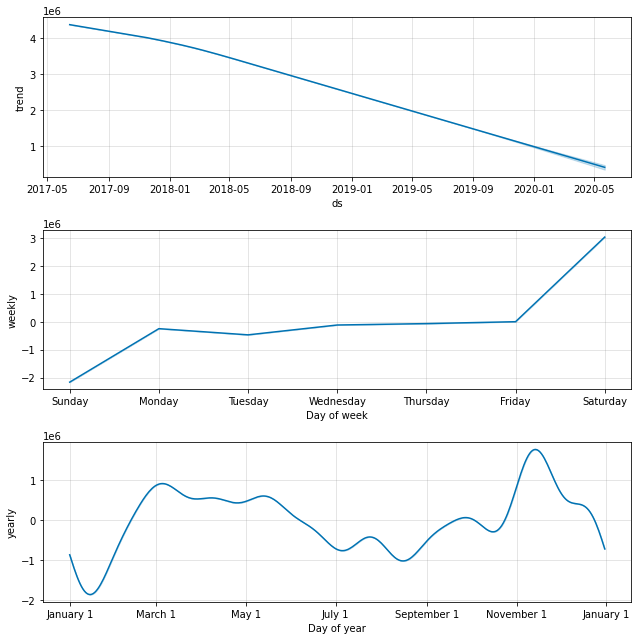

In [ ]:
model.plot_components(prediction)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

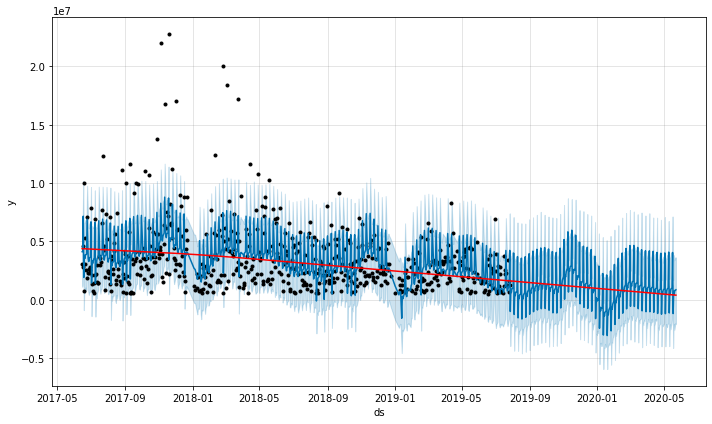

In [ ]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')

INFO:fbprophet:Making 44 forecasts with cutoffs between 2017-09-20 00:00:00 and 2019-06-27 00:00:00


  0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-09-21,6.059308e+06,3.797800e+06,8.283103e+06,10044500,2017-09-20
1,2017-09-22,7.302239e+06,4.999794e+06,9.708964e+06,2235111,2017-09-20
2,2017-09-23,1.356697e+07,1.133674e+07,1.583684e+07,9951000,2017-09-20
3,2017-09-26,1.619254e+07,1.378962e+07,1.847118e+07,4076500,2017-09-20
4,2017-09-27,2.010485e+07,1.777058e+07,2.250654e+07,2120000,2017-09-20


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,8.718014e+12,2.952628e+06,2.174510e+06,0.906148,0.505583,0.765597
1,5 days,9.938669e+12,3.152566e+06,2.232447e+06,0.858160,0.518598,0.785205
2,6 days,1.297452e+13,3.602017e+06,2.484835e+06,0.848041,0.518276,0.735294
3,7 days,1.651858e+13,4.064305e+06,2.552095e+06,0.826650,0.527397,0.748366
4,8 days,1.980171e+13,4.449911e+06,2.677619e+06,0.909786,0.515457,0.726815


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

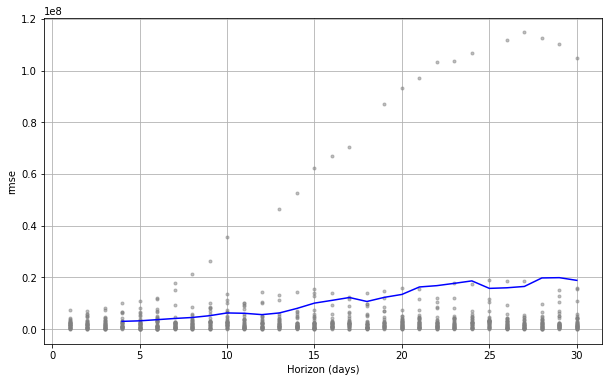

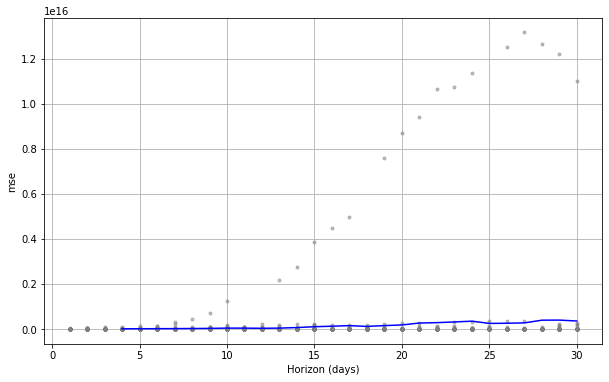

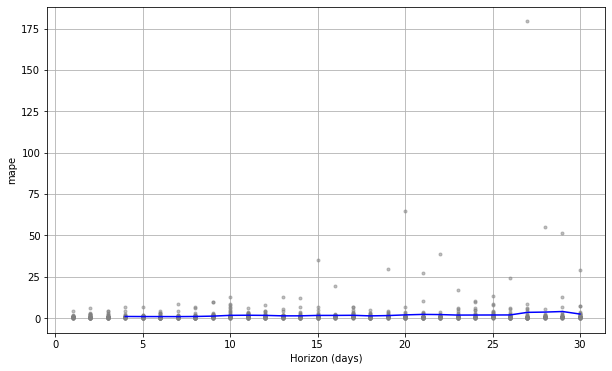

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')
df_performance=plot_cross_validation_metric(df_cv,metric='mse')
df_performance=plot_cross_validation_metric(df_cv,metric='mape')

> Dapat dilihat bahwa ukuran metric yang tidak tinggi dan mendekati nol menandakan bahwa model tersebut bagus.
